# Why Polynomial Regression?

A simple linear regression algorithm only works when the relationship between the data is linear. But suppose we have non-linear data, then linear regression will not be able to draw a best-fit line. Simple regression analysis fails in such conditions. Consider the below diagram, which has a non-linear relationship, and you can see the linear regression results on it, which does not perform well, meaning it does not come close to reality. Hence, we introduce polynomial regression to overcome this problem, which helps identify the curvilinear relationship between independent and dependent variables.

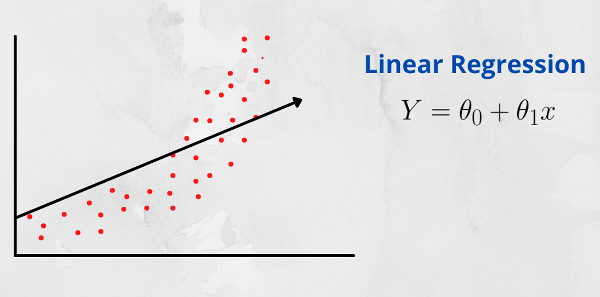

# How Does Polynomial Regression Handle Non-Linear Data?

Polynomial regression is a form of Linear regression where only due to the Non-linear relationship between dependent and independent variables, we add some polynomial terms to linear regression to convert it into Polynomial regression.

In polynomial regression, the relationship between the dependent variable and the independent variable is modeled as an nth-degree polynomial function. When the polynomial is of degree 2, it is called a quadratic model; when the degree of a polynomial is 3, it is called a cubic model, and so on.

Suppose we have a dataset where variable X represents the Independent data and Y is the dependent data. Before feeding data to a mode in the preprocessing stage, we convert the input variables into polynomial terms using some degree.

Consider an example my input value is 35, and the degree of a polynomial is 2, so I will find 35 power 0, 35 power 1, and 35 power 2 this helps to interpret the non-linear relationship in data.
The equation of polynomials becomes something like this.

**y = a0 + a1x1 + a2x12 + … + anx1n**

The degree of order which to use is a Hyperparameter, and we need to choose it wisely. But using a high degree of polynomial tries to overfit the data, and for smaller values of degree, the model tries to underfit, so we need to find the optimum value of a degree. Polynomial Regression models are usually fitted with the method of least squares. The least square method minimizes the variance of the coefficients under the Gauss-Markov Theorem.

# Why Is Polynomial Regression Called Polynomial Linear Regression?

If you see the equation of polynomial regression carefully, then we can see that we are trying to estimate the relationship between coefficients and y. And the values of x and y are already given to us, only we need to determine coefficients, and the degree of coefficient here is 1 only, and degree one represents simple linear regression Hence, Polynomial Regression is also known as Polynomial Linear Regression as it has a polynomial equation and this is only the simple concept behind this. I hope you got the point right.

**Linear Regression Vs. Polynomial Regression**

Now we know how polynomial regression works and helps to build a model over non-linear data. Let’s compare both algorithms practically and see the results.

First, we will generate the data using some equation ax^2 + bx + c, and then apply simple linear regression to it to form a linear equation. Then we will apply polynomial regression on top of it, which will make an easy comparison between the practical performance of both algorithms.

Initially, we will try it with only one input column and one output column. After having a brief understanding we will try it on high-dimensional data.

# Polynomial Regression With One Variable

**Step 1: Import all the libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

**Step 2: Create and visualize the data**

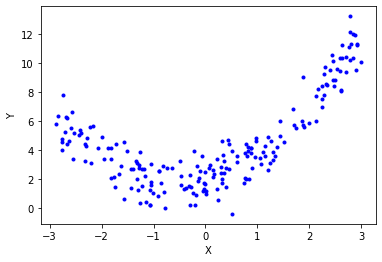

In [3]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

We have added some random noise in the data so that while modeling, it does not overfit it.

**Step 3: Split data in the train and test set**

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**Step 4: Apply simple linear regression**

Now we will analyze the prediction by fitting simple linear regression. We can see how worse the model is performing, It is not capable of estimating the points.

In [5]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.39063877427932525


**Step 5: Apply polynomial regression**

Now we will convert the input to polynomial terms by using the degree as 2 because of the equation we have used, the intercept is 2. while dealing with real-world problems, we choose degree by heat and trial method.

In [7]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.9289548488062587


After converting to polynomial terms, we fit the linear regression which is now working as polynomial regression. If you print the x_train value and train transformed value, you will see the 3 polynomial terms. And the model is now performing descent well and if you see the coefficients and intercept value. our coefficient was 0.9, and it predicted 0.88 and the intercept was 2 it has given 1.9 which is very close to the original and the model can be said as a generalized model.

In [8]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.85870257 0.80719148]]
[2.04894331]


If we visualize the predicted line across the training data points, we can see how well it identifies the non-linear relationship in data.

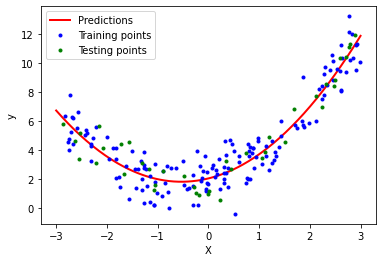

In [9]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Playing With a Polynomial Degree

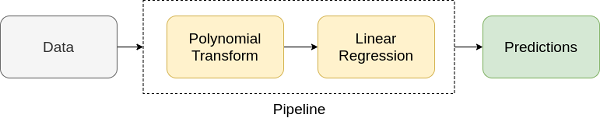

Now we will design a function that will help you to find the right value for a degree. here we apply all the preprocessing steps we have done above in a function and map the end prediction plot on it. All you need to do to pass is the degree and it will build a model and plot a graph of a particular degree. here we will create a pipeline of preprocessing steps that makes the process streamlined.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

when we run the function while passing high degrees like 10, 15, and 20, then the model tries to overfit the data means slowly the prediction line will leave its original essence and try to rely on training data points, and as there is some change in the training path, the line tries to catch the point.

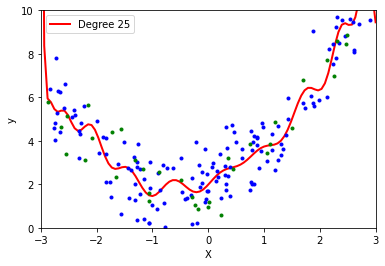

In [13]:
polynomial_regression(25)

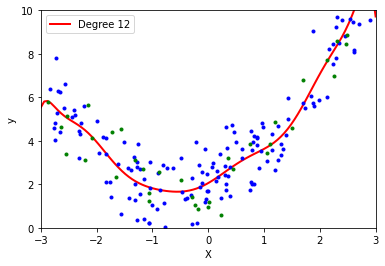

In [14]:
polynomial_regression(12)

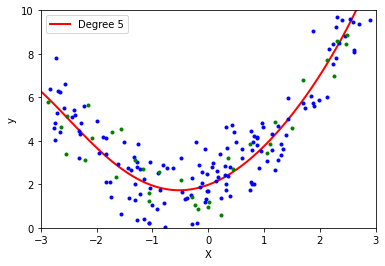

In [15]:
polynomial_regression(5)

This is a problem with a High degree of polynomial, which I want to show you practically, so it’s necessary to choose an optimum value of a degree. here I would like to recommend you try a different degree and analyze the results.